# Machine Learning Algorithms

Estimating the Gradient


In [7]:
from functools import partial
import numpy as np


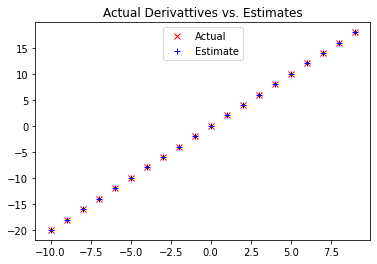

In [22]:
def square(x):
    return x ** 2

def derivate(x):
    return 2 * x

def difference_quotient(f, x, h):
    return (f(x + h) - f(x)) / h

derivate_estimate = partial(difference_quotient, square, h = 0.0001)

# plot to show they're basically same
import matplotlib.pyplot as plt
x = np.arange(-10, 10)
plt.title('Actual Derivattives vs. Estimates')
plt.plot(x, np.apply_along_axis(derivate, 0, x), 'rx', label = 'Actual')
plt.plot(x, np.apply_along_axis(derivate_estimate, 0, x), 'b+', label = 'Estimate')
plt.legend(loc  = 9)
plt.show()

Compute the ith partial difference quotient of function at inputs.

In [26]:

def partial_difference_quotient(f, v, i, h):
    w = [v[ix] + (h if i==ix else 0) 
         for ix in range(len(v))]
    
    return (f(w) - f(v)) / h

# 

def estimate_gradient(f, v, h = 0.0001):
    return [partial_difference_quotient(f, v, i, h) 
            for i in range(len(v))]


In [ ]:
def step(v, direction, step_size):
    '''move step_size in the direction from v'''
    return [v_i + step_size * direction_i 
            for v_i, direction_i in zip(v, direction)]

def sum_of_square_gradient(v):
    return [2 * v_i for v_i in v]

# pick a random starting point
v = np.random.randint(-10, 10, 3)

tolerance = 0.0000001

while True:
    gradient = sum_of_square_gradient(v)
    next_v = step(v, gradient, -0.01)
    if 

In [ ]:
dataset = dict(
    day = ['D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14'],
    outlook = ['Sunny', 'Sunny', 'Overcast', 'Rain', 'Rain', 'Rain', 'Overcast', 'Sunny', 'Sunny', 'Rain', 'Sunny', 'Overcast', 'Overcast', 'Rain'],
    temperature = ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild'],
    humidity = ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High'],
    wind = ['Weak', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Strong'],
    play_tennis = [0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0]
    )

In [13]:
import pandas as pd
df = pd.DataFrame(dataset)
df = df.set_index('day')
df

,outlook,temperature,humidity,wind,play_tennis
day,,,,,
D1,Sunny,Hot,High,Weak,0
D2,Sunny,Hot,High,Strong,0
D3,Overcast,Hot,High,Weak,1
D4,Rain,Mild,High,Weak,1
D5,Rain,Cool,Normal,Weak,1
D6,Rain,Cool,Normal,Strong,0
D7,Overcast,Cool,Normal,Strong,1
D8,Sunny,Mild,High,Weak,0
D9,Sunny,Cool,Normal,Weak,1


In [28]:
df[df.temperature == 'Cool']

,outlook,temperature,humidity,wind,play_tennis
day,,,,,
D5,Rain,Cool,Normal,Weak,1
D6,Rain,Cool,Normal,Strong,0
D7,Overcast,Cool,Normal,Strong,1
D9,Sunny,Cool,Normal,Weak,1


In [29]:
df.play_tennis.value_counts()

1    9
0    5
Name: play_tennis, dtype: int64

In [16]:
import numpy as np

df = df.astype(dict(
    outlook = 'category', 
    temperature = 'category',
    humidity = 'category',
    wind = 'category',
    play_tennis = np.uint8))

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14 entries, D1 to D14
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   outlook      14 non-null     category
 1   temperature  14 non-null     category
 2   humidity     14 non-null     category
 3   wind         14 non-null     category
 4   play_tennis  14 non-null     uint8   
dtypes: category(4), uint8(1)
memory usage: 694.0+ bytes


In [30]:
(9 * 3) / (14 * 4)

0.48214285714285715

In [1]:
from sklearn.datasets import fetch_california_housing

In [5]:
data = fetch_california_housing()

In [10]:
print(data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [11]:
import pandas as pd

df = pd.DataFrame(data.data, columns = data.feature_names)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [15]:
df[data.target_names[0]] = data.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [16]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [17]:
import seaborn as sns

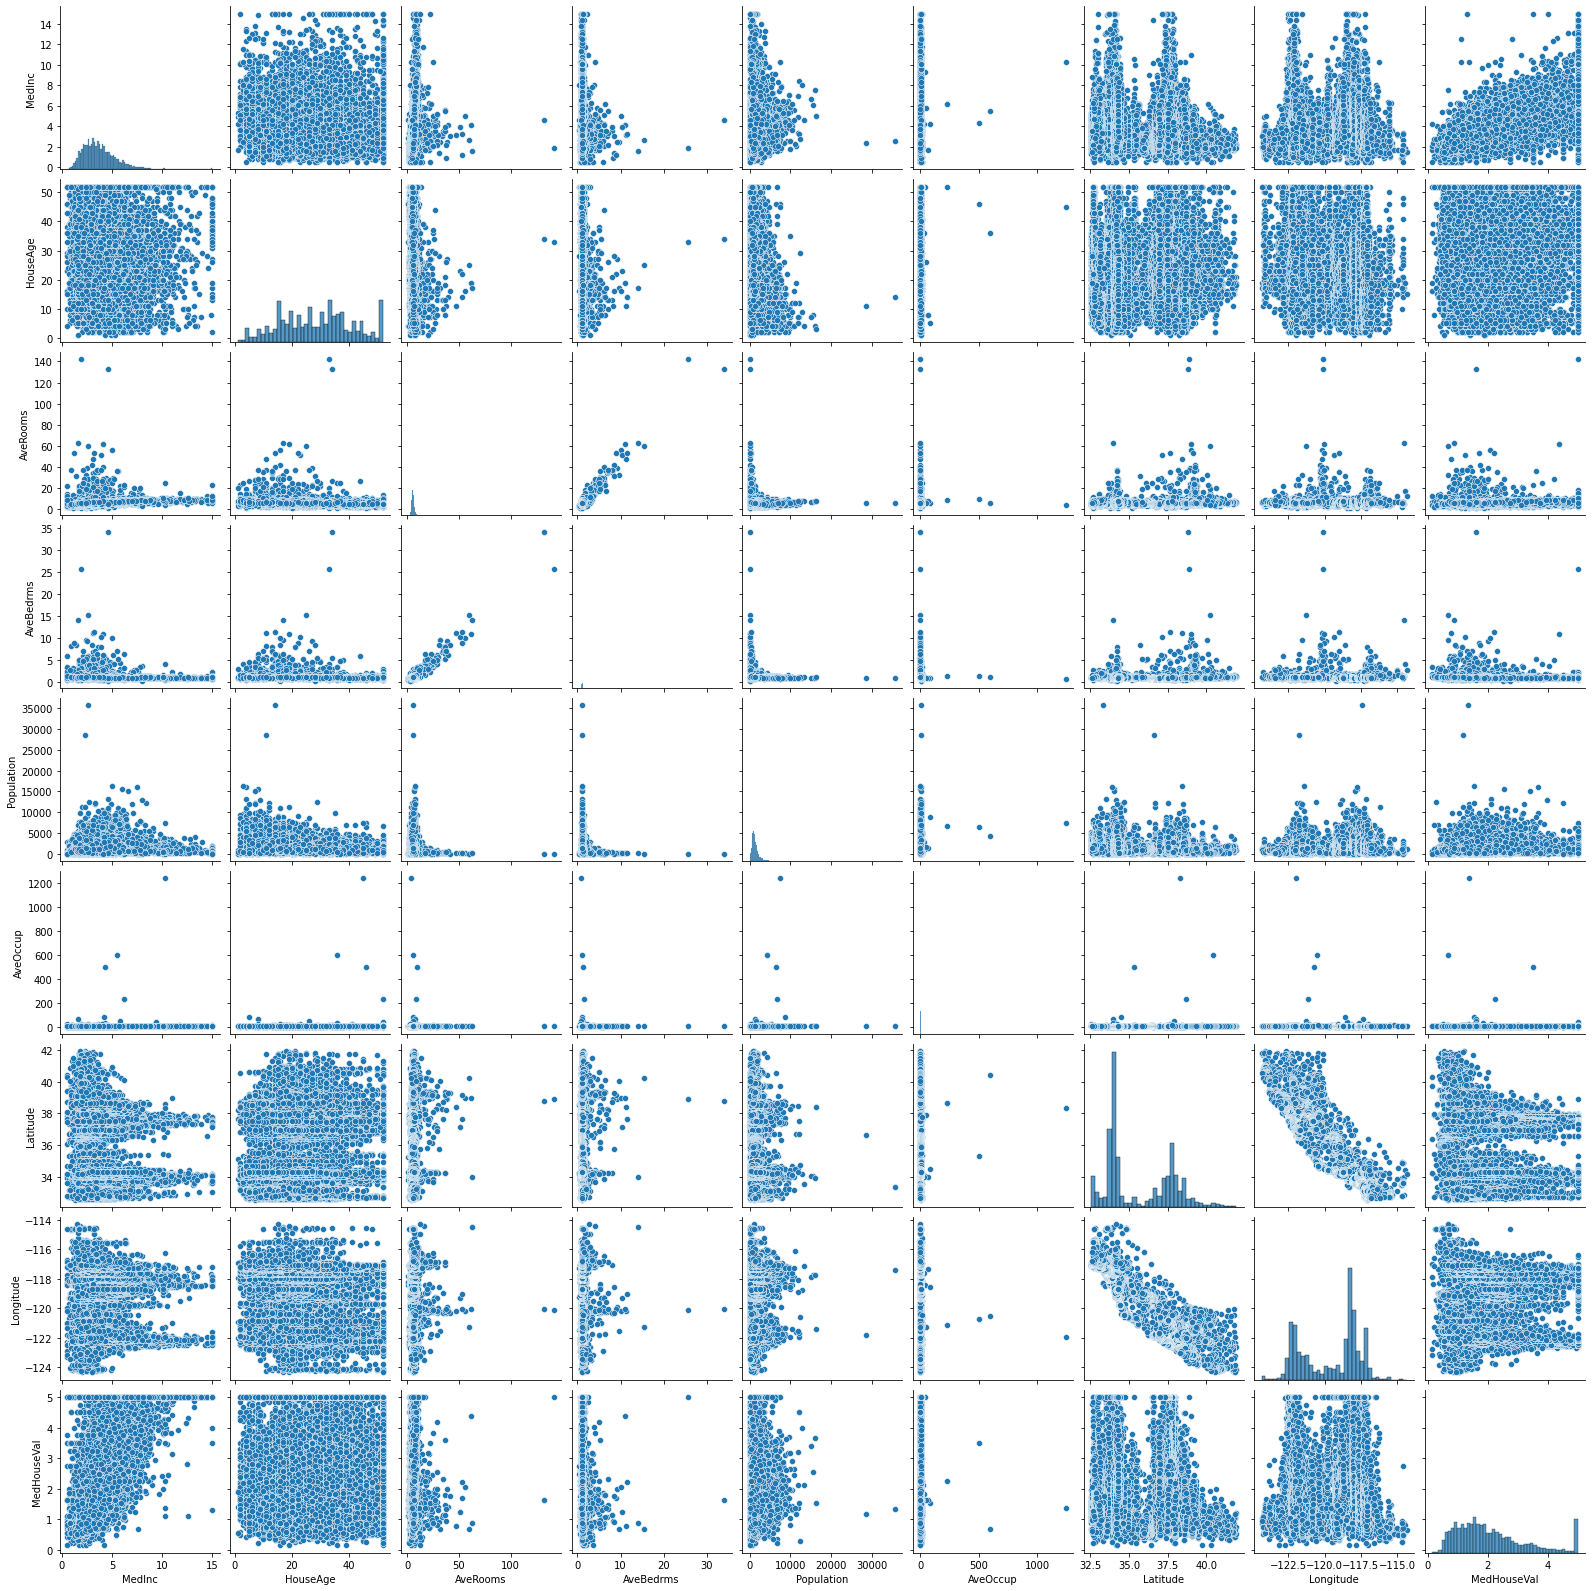

In [18]:
sns.pairplot(df)

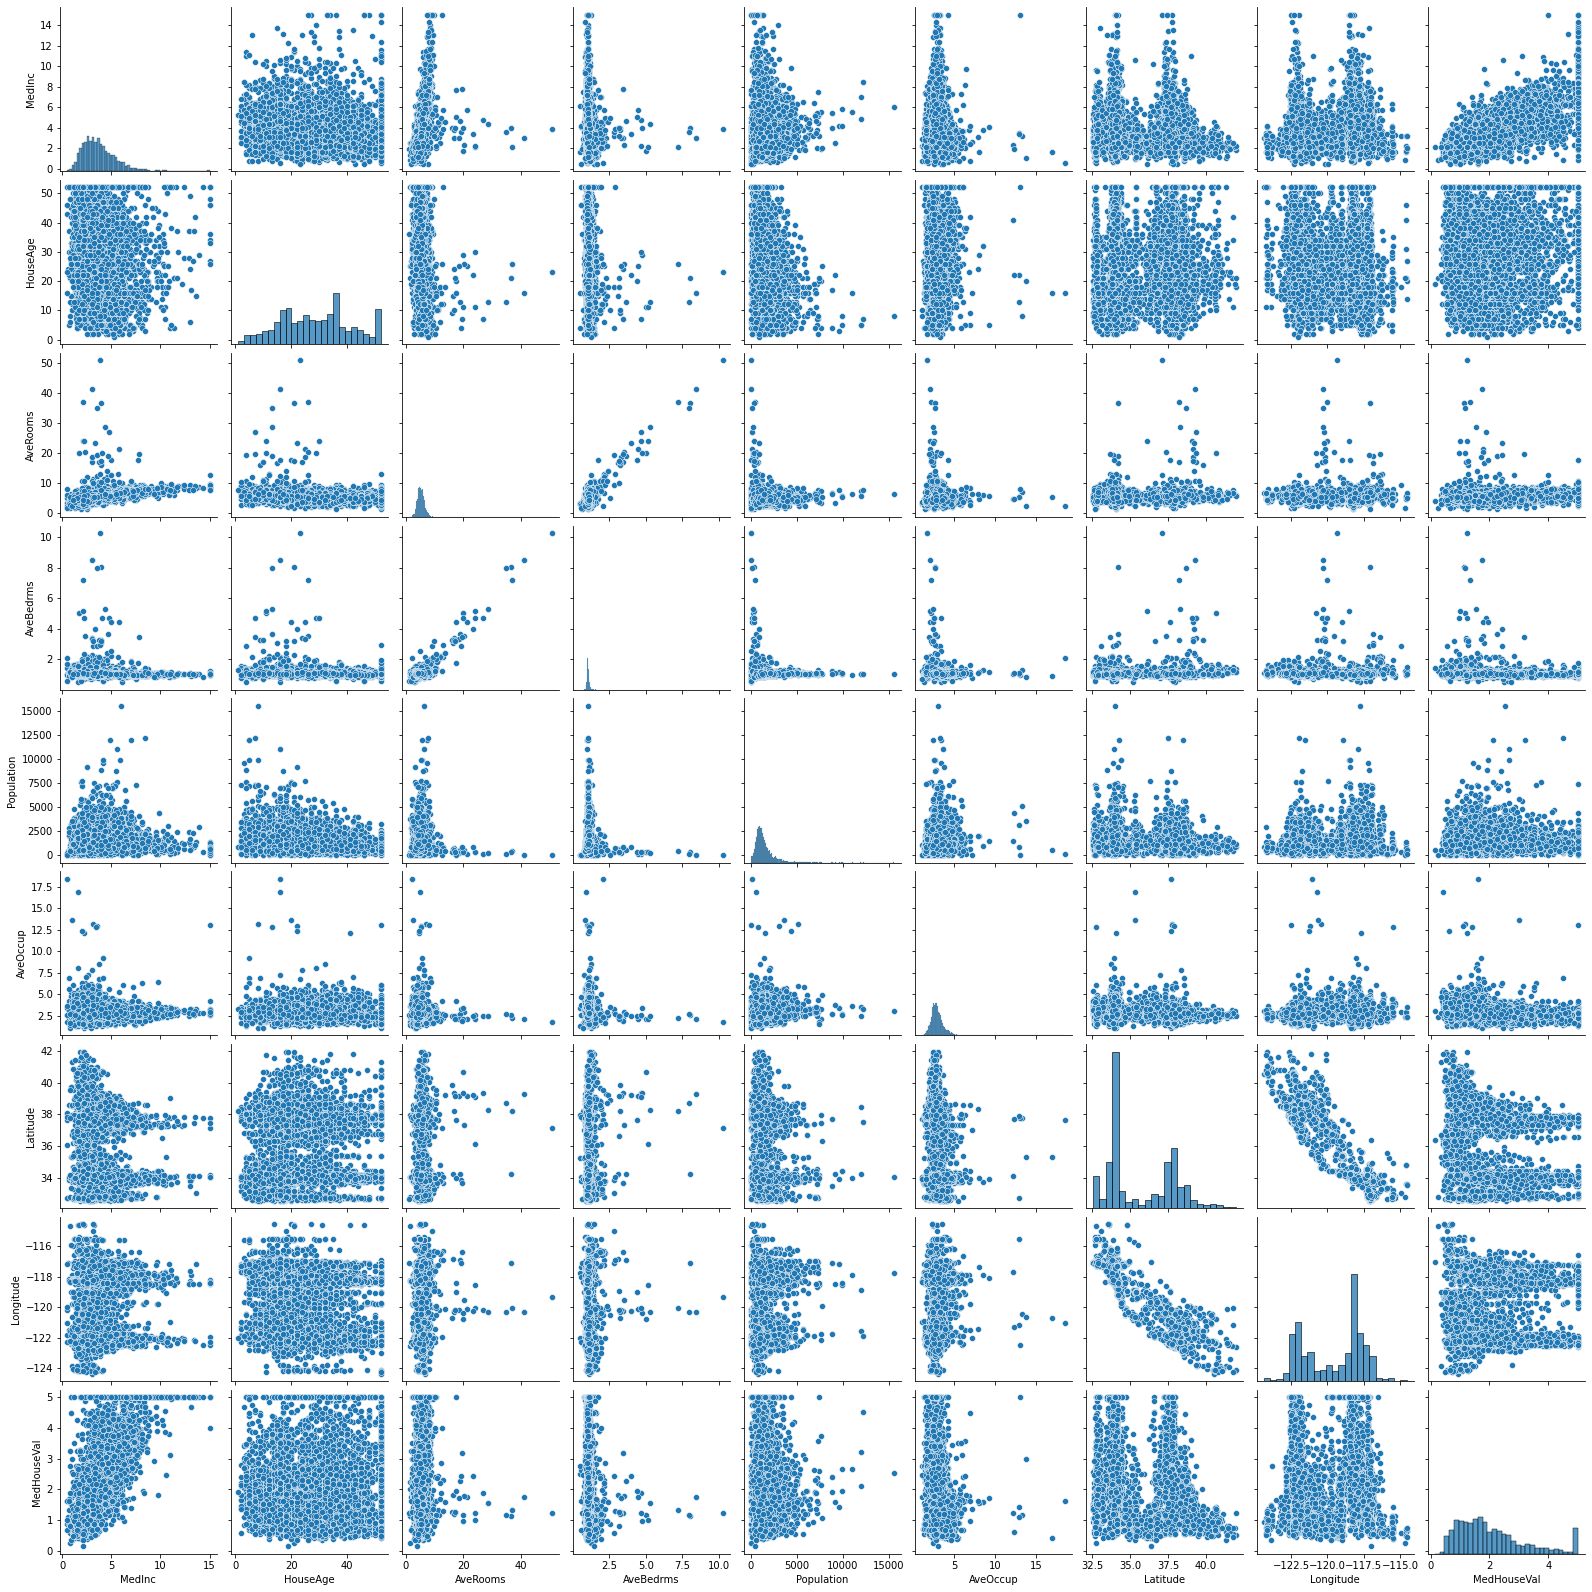

In [21]:
sns.pairplot(df.sample(frac = 0.25))

In [22]:
X = data.data
Y = data.target

In [23]:
from sklearn.model_selection import train_test_split as tts

X_train, X_test, y_train, y_test = tts(X, Y, test_size = 0.3, random_state = 42)

In [25]:
from sklearn.preprocessing import StandardScaler as SS

scaler = SS()

In [26]:
x_train = scaler.fit_transform(X_train)
x_train

array([[ 0.13350629,  0.50935748,  0.18106017, ..., -0.01082519,
        -0.80568191,  0.78093406],
       [-0.53221805, -0.67987313, -0.42262953, ..., -0.08931585,
        -1.33947268,  1.24526986],
       [ 0.1709897 , -0.36274497,  0.07312833, ..., -0.04480037,
        -0.49664515, -0.27755183],
       ...,
       [-0.49478713,  0.58863952, -0.59156984, ...,  0.01720102,
        -0.75885816,  0.60119118],
       [ 0.96717102, -1.07628333,  0.39014889, ...,  0.00482125,
         0.90338501, -1.18625198],
       [-0.68320166,  1.85715216, -0.82965604, ..., -0.0816717 ,
         0.99235014, -1.41592345]])

In [27]:
x_test = scaler.transform(X_test)
x_test

array([[-1.1526893 , -0.28346293, -0.50781822, ...,  0.06127763,
         0.19166399,  0.28664112],
       [-0.70640568,  0.11294728, -0.16252032, ..., -0.03551561,
        -0.23911452,  0.06196251],
       [-0.20830675,  1.85715216, -0.59546738, ..., -0.14215427,
         1.00639726, -1.42590916],
       ...,
       [-0.19155996, -0.99700129, -0.6830438 , ..., -0.06058827,
        -0.92742367,  0.8358555 ],
       [-0.11911302, -1.47269353,  0.02607207, ...,  0.03461374,
         1.01576201, -0.84673764],
       [-0.43304974, -0.91771925, -0.84872893, ..., -0.0407528 ,
        -0.70266966,  0.67109119]])